In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
houses_test = pd.read_csv("test.csv", index_col=0)
houses_train = pd.read_csv("train.csv", index_col=0)

In [5]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [7]:
houses_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [11]:
houses_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
houses_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrArea'], axis=1, inplace=True)
houses_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrArea'], axis=1, inplace=True)

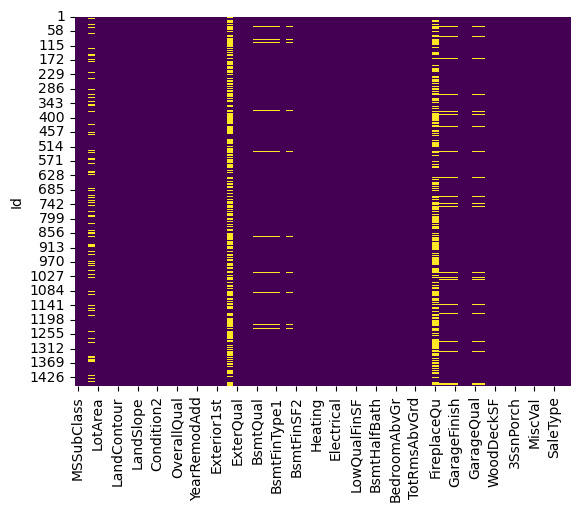

In [15]:
sns.heatmap(houses_train.isna(), cmap="viridis", cbar=False)
plt.show()

In [17]:
houses_train['LotFrontage'] = houses_train['LotFrontage'].fillna(houses_train['LotFrontage'].mean())

In [19]:
houses_test['LotFrontage'] = houses_test['LotFrontage'].fillna(houses_test['LotFrontage'].mean())

In [21]:
houses_train.ffill(inplace=True)

In [23]:
houses_test.ffill(inplace=True)

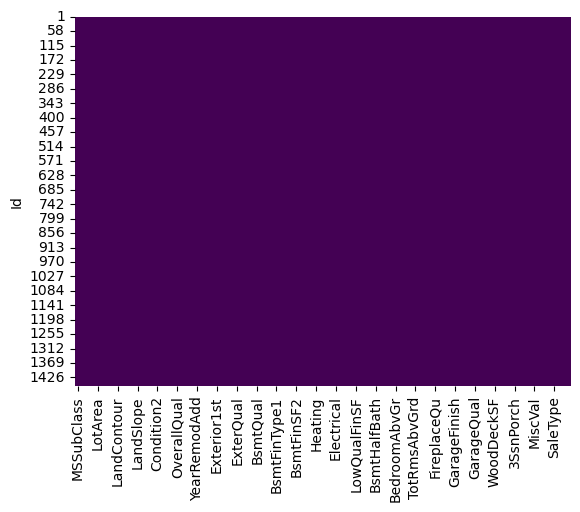

In [25]:
sns.heatmap(houses_train.isna(), cmap="viridis", cbar=False)
plt.show()

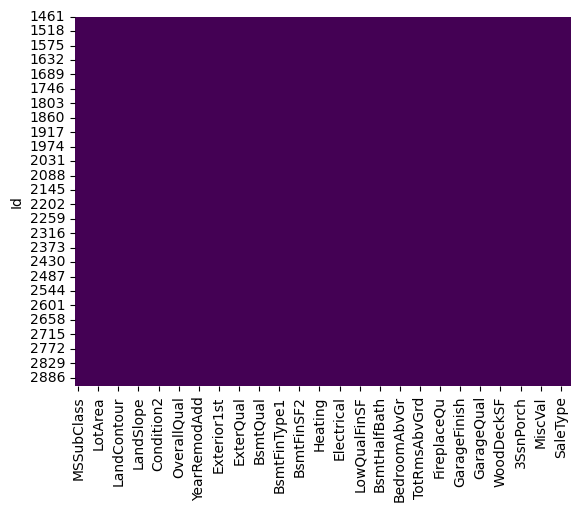

In [27]:
sns.heatmap(houses_test.isna(), cmap="viridis", cbar=False)
plt.show()

In [29]:
for col in houses_train.select_dtypes(include=['object']).columns:
    houses_train[col], _ = pd.factorize(houses_train[col])

for col in houses_test.select_dtypes(include=['object']).columns:
    houses_test[col], _ = pd.factorize(houses_test[col])

In [31]:
houses_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,0,80.0,11622,0,0,0,0,0,0,...,0,0,0,120,0,0,6,2010,0,0
1462,20,1,81.0,14267,0,1,0,0,1,0,...,36,0,0,0,0,12500,6,2010,0,0
1463,60,1,74.0,13830,0,1,0,0,0,0,...,34,0,0,0,0,0,3,2010,0,0
1464,60,1,78.0,9978,0,1,0,0,0,0,...,36,0,0,0,0,0,6,2010,0,0
1465,120,1,43.0,5005,0,1,1,0,0,0,...,82,0,0,144,0,0,1,2010,0,0


In [39]:
houses_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
2,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
3,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
4,70,0,60.0,9550,0,1,0,0,2,0,...,272,0,0,0,0,2,2006,0,1,140000
5,60,0,84.0,14260,0,1,0,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000


In [41]:
X_train = houses_train.drop('SalePrice', axis=1)
y_train = houses_train['SalePrice']

In [73]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    learning_rate=0.05,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0.01,
    lambda_=0.1,
    random_state=42
)

In [75]:
model.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "lambda_" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None, lambda_=0.1,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200, ...)

In [79]:
sample_predictions = pd.read_csv("sample_submission.csv", index_col='Id')

In [111]:
houses_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,0,80.0,11622,0,0,0,0,0,0,...,0,0,0,120,0,0,6,2010,0,0
1462,20,1,81.0,14267,0,1,0,0,1,0,...,36,0,0,0,0,12500,6,2010,0,0
1463,60,1,74.0,13830,0,1,0,0,0,0,...,34,0,0,0,0,0,3,2010,0,0
1464,60,1,78.0,9978,0,1,0,0,0,0,...,36,0,0,0,0,0,6,2010,0,0
1465,120,1,43.0,5005,0,1,1,0,0,0,...,82,0,0,144,0,0,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,2,21.0,1936,0,0,0,0,0,0,...,0,0,0,0,0,0,6,2006,0,0
2916,160,2,21.0,1894,0,0,0,0,0,0,...,24,0,0,0,0,0,4,2006,0,2
2917,20,1,160.0,20000,0,0,0,0,0,0,...,0,0,0,0,0,0,9,2006,0,2


In [113]:
predicts = model.predict(houses_test)

In [129]:
rmse = mean_squared_error(sample_predictions, predicts, squared=False)
print(f"RMSE: {rmse}")

RMSE: 68231.6407193768


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [133]:
r2 = r2_score(sample_predictions, predicts)
print(f"R²: {r2}")

R²: -16.074129104614258
